# Amazon Sale Analysis

### Import python libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Import dataset 

In [3]:

df = pd.read_csv(r"E:\Data science -Data Analytics\python Library\Python Project for DA\Amazon sale\Amazon Sale Report.csv")
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [4]:
df.shape

(128975, 24)

In [12]:
df.head()        # Give first five rows

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [13]:
df.tail()      # Give last five column

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128974,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [7]:
#drop unrelated/blank columns
df.drop(['Unnamed: 22'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [9]:
df.isnull()      # checking null values

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
128971,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
128972,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
128973,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [10]:
df.isnull().sum()      # sum will give total values of null values

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
dtype: int64

In [11]:
df.shape

(128975, 23)

In [13]:
# drop null values
df.dropna(inplace=True)

In [14]:
df.shape

(32338, 23)

In [12]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

In [15]:
# change data type
df['ship-postal-code']=df['ship-postal-code'].astype('int')

In [17]:
# checking whether the data type change or not
df['ship-postal-code'].dtype

dtype('int32')

In [20]:
df['Date']=pd.to_datetime(df['Date'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32338 entries, 1 to 128891
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               32338 non-null  int64         
 1   Order ID            32338 non-null  object        
 2   Date                32338 non-null  datetime64[ns]
 3   Status              32338 non-null  object        
 4   Fulfilment          32338 non-null  object        
 5   Sales Channel       32338 non-null  object        
 6   ship-service-level  32338 non-null  object        
 7   Style               32338 non-null  object        
 8   SKU                 32338 non-null  object        
 9   Category            32338 non-null  object        
 10  Size                32338 non-null  object        
 11  ASIN                32338 non-null  object        
 12  Courier Status      32338 non-null  object        
 13  Qty                 32338 non-null  int64         

In [24]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

In [25]:
#rename Columns
df.rename(columns={'Qty':'Quantity'})

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.0,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,1,INR,399.0,HYDERABAD,TELANGANA,500032,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-XS,kurta,...,1,INR,399.0,Amravati.,MAHARASHTRA,444606,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
14,14,408-1298370-1920302,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0351,J0351-SET-L,Set,...,1,INR,771.0,MUMBAI,MAHARASHTRA,400053,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
15,15,403-4965581-9520319,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,PJNE3368,PJNE3368-KR-6XL,kurta,...,1,INR,544.0,GUNTAKAL,ANDHRA PRADESH,515801,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128872,128872,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0243,J0243-DR-S,Ethnic Dress,...,1,INR,999.0,ALLUR,ANDHRA PRADESH,524315,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
128873,128873,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0079,J0079-SKD-S,Set,...,1,INR,1523.0,ALLUR,ANDHRA PRADESH,524315,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
128874,128874,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0009,J0009-SKD-S,Set,...,1,INR,854.0,ALLUR,ANDHRA PRADESH,524315,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
128887,128887,405-6493630-8542756,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0301,J0301-TP-M,Top,...,1,INR,518.0,NOIDA,UTTAR PRADESH,201301,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship


In [26]:
#describe()  method return description of the data in the Dataframe(i,e count,mean,std,min,etc)
df.describe()

,index,Date,Qty,Amount,ship-postal-code
count,32338.000000,32338,32338.000000,32338.000000,32338.000000
mean,60920.649174,2022-05-11 09:59:08.790896128,1.004855,651.285979,462118.516018
min,1.000000,2022-03-31 00:00:00,1.000000,0.000000,110001.000000
25%,27157.000000,2022-04-20 00:00:00,1.000000,459.000000,370001.000000
50%,63419.000000,2022-05-09 00:00:00,1.000000,631.000000,500018.000000
75%,91754.750000,2022-06-01 00:00:00,1.000000,771.000000,600037.000000
max,128891.000000,2022-06-29 00:00:00,5.000000,5495.000000,855115.000000
std,36849.712239,NaN,0.085110,284.247292,194297.838646


In [27]:
df.describe(include='object')        # include use for object value

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by
count,32338,32338,32338,32338,32338,32338,32338,32338,32338,32338,32338,32338,32338,32338,32338,32338,32338
unique,29927,10,1,1,1,1081,4600,8,11,4598,2,1,4322,57,1,5764,1
top,404-9932919-6662730,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Amazon PLCC Free-Financing Universal Merchant ...,Easy Ship
freq,11,28724,32338,32338,32338,2241,455,12087,5937,455,31838,32338,2549,5418,32338,458,32338


In [28]:
# use describe() for Specific columns
df[['Qty','Amount']].describe()

,Qty,Amount
count,32338.000000,32338.000000
mean,1.004855,651.285979
std,0.085110,284.247292
min,1.000000,0.000000
25%,1.000000,459.000000
50%,1.000000,631.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


### Exploratory Data  Analysis

In [29]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

# CountPlot

## 1) Size

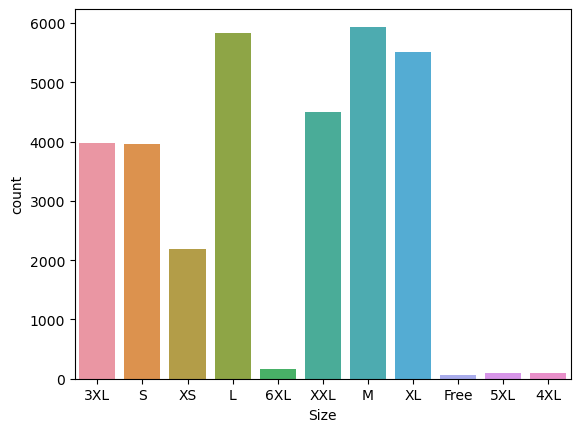

In [38]:
ax=sns.countplot(data=df, x='Size');

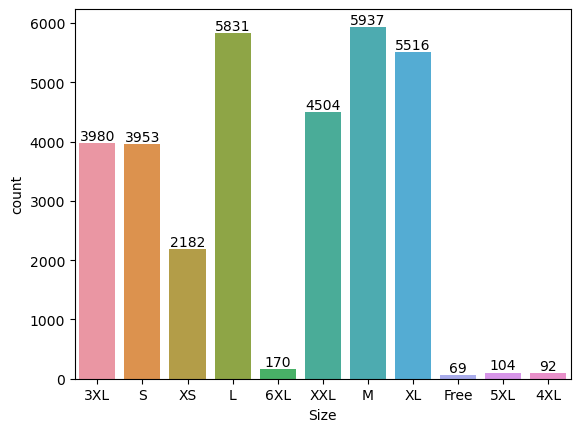

In [39]:
ax=sns.countplot(data=df,x='Size')
for bars in ax.containers:
    ax.bar_label(bars)


**From above graph you can see  that most of the people buys M-size**

### GroupBy

**The groupby() function in pandas is used to group data based on one or more columns in a DataFrame**

In [40]:
df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)

,Size,Qty
6,M,5971
5,L,5858
8,XL,5539
10,XXL,4520
0,3XL,4004
7,S,3970
9,XS,2193
3,6XL,170
2,5XL,104
1,4XL,93


<Axes: xlabel='Size', ylabel='Qty'>

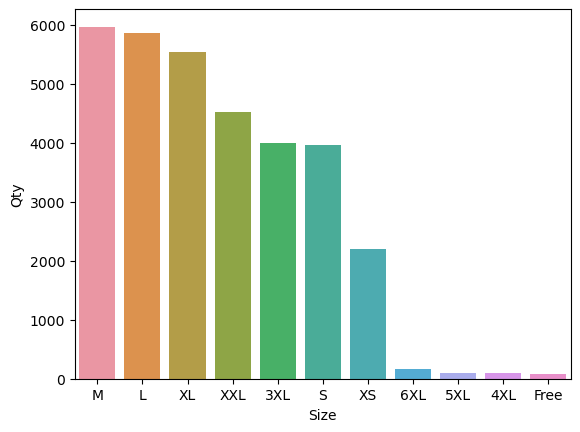

In [41]:
S_Qty=df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty',ascending=False)
sns.barplot(data=S_Qty,x='Size',y='Qty')

**From above Graph you can see that most of the Qty buys M-Size in the sales**

### 3) Courier Status

<Axes: xlabel='Courier Status', ylabel='count'>

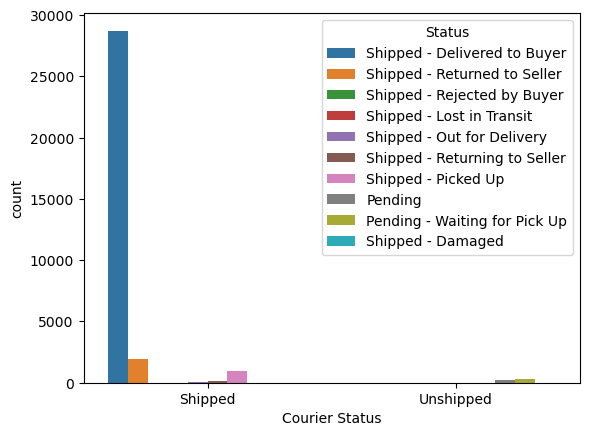

In [42]:
sns.countplot(data=df, x='Courier Status',hue= 'Status')

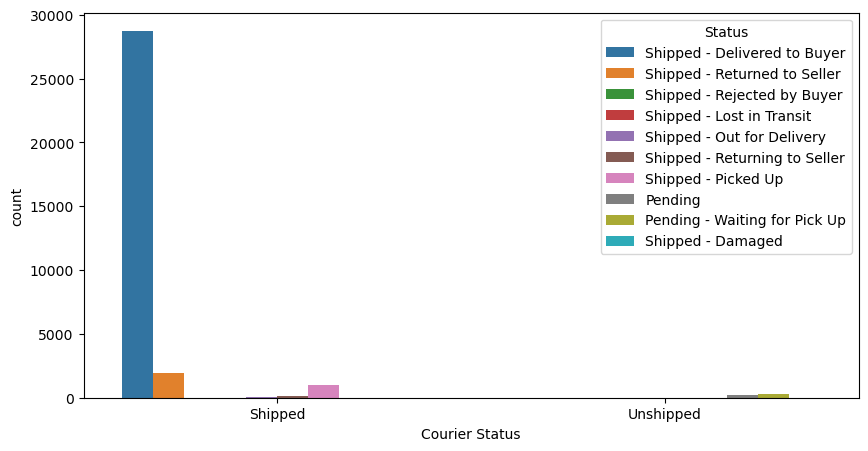

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Courier Status',hue= 'Status')
plt.show()

**From above Graph the majority of the orders are shipped through the courier.**

# Histogram

### 1)Size

<Axes: xlabel='Size', ylabel='Count'>

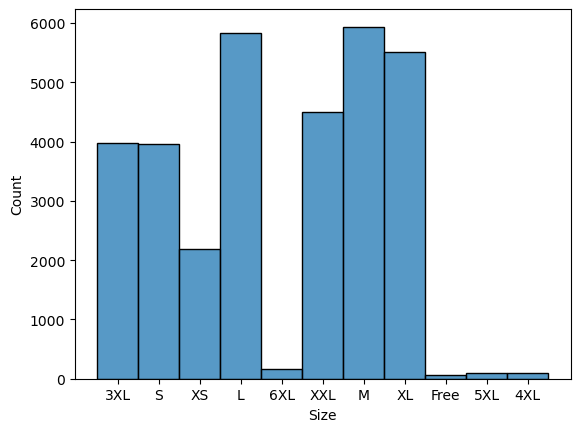

In [52]:
sns.histplot(data=df,x='Size')

### 2)Category

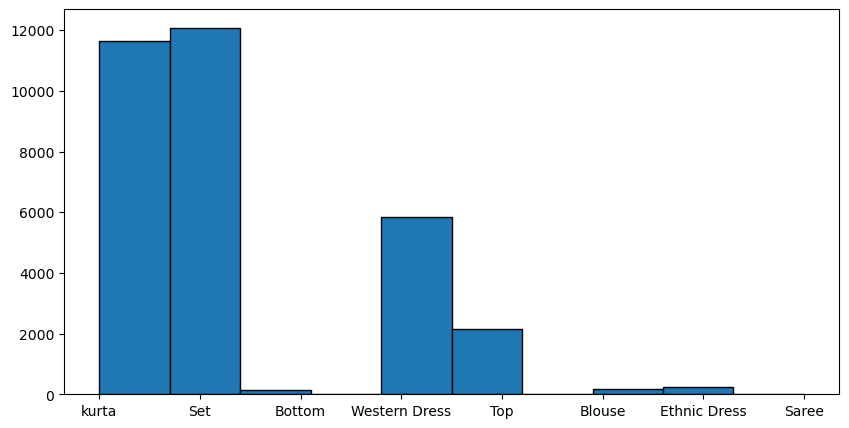

In [57]:
df['Category'] = df['Category'].astype(str)      # change data type of Category object to string
column_data = df['Category']
plt.figure(figsize=(10, 5))
plt.hist(column_data, bins=10, edgecolor='Black')
#plt.xticks(rotation=90)     # using label rotation
plt.show()

**From above Graph you can see that most of the buyers are Set**

# Piechart

### 1)B2B

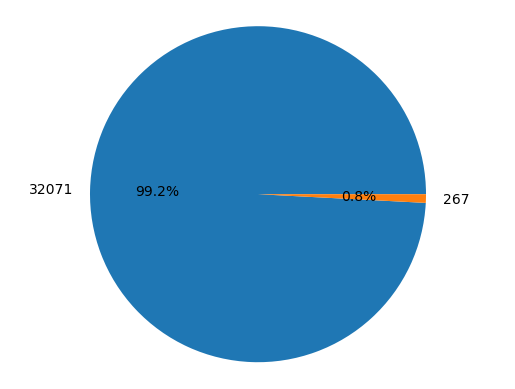

In [59]:
#Checking B2B Data  by using pie chart 
B2B_Check = df['B2B'].value_counts()
# Plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

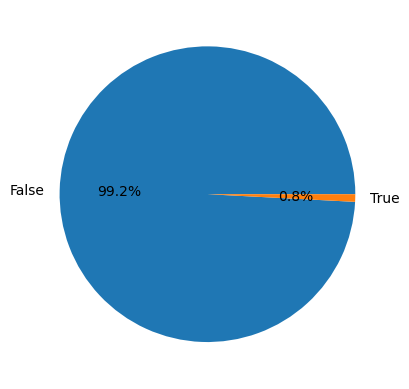

In [60]:
# Checking B2B Data  by using pie chart 
B2B_Check = df['B2B'].value_counts()
#  Plot the pie chart
plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%1.1f%%')         # using index for labelling
#plt.axis('equal')
plt.show()

**From above chart we can see that maximum i.e. 99.2% of buyers are retailers and 0.8% are B2B buyers**

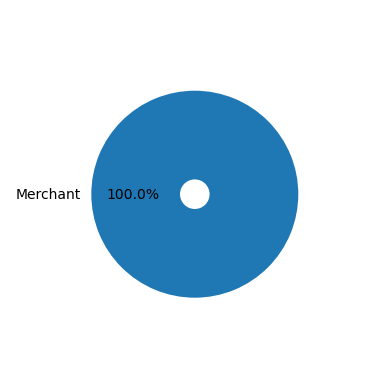

In [64]:
# Prepare data for pie chart
a1 = df['Fulfilment'].value_counts()
# Step 4: Plot the pie chart
fig, ax = plt.subplots()
ax.pie(a1, labels=a1.index, autopct='%1.1f%%', radius=0.7, wedgeprops=dict(width=0.6))
ax.set(aspect="equal")
plt.show()

From above chart you can see that most of the Fulfilment are amazon.

# Scatter plot

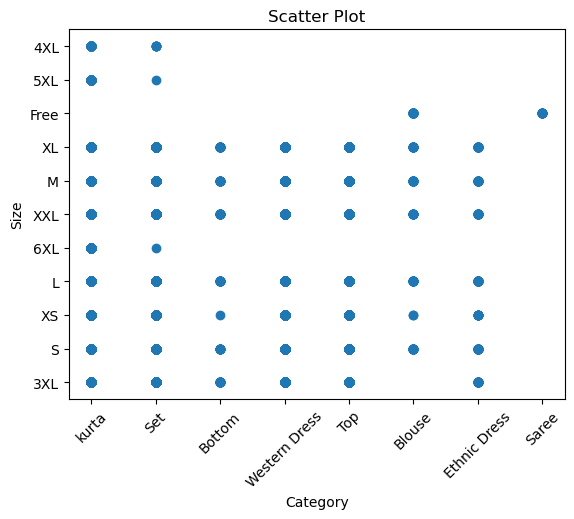

In [61]:
# Prepare data for scatter plot
x_data = df['Category']  
y_data = df['Size'] 

# Plot the scatter plot
plt.scatter(x_data, y_data)
plt.xlabel('Category')  
plt.ylabel('Size')  
plt.title('Scatter Plot')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

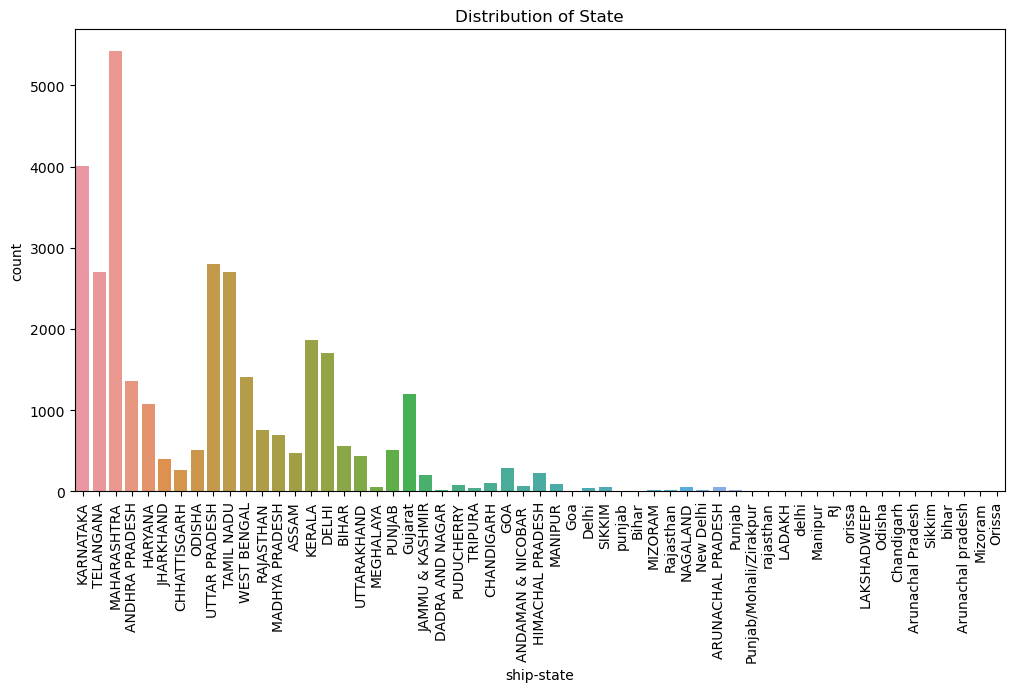

In [62]:
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

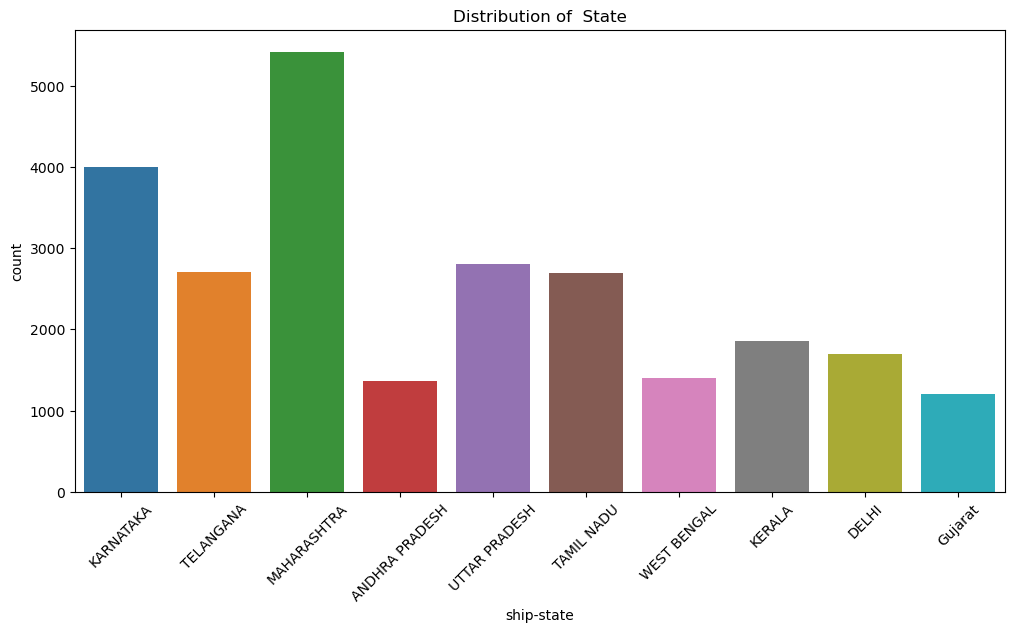

In [63]:
# top_10_States 
top_10_state = df['ship-state'].value_counts().head(10)
# Plot count of cities by state
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of  State')
plt.xticks(rotation=45)
plt.show()


**From above Graph you can see that most of the buyers are Maharashtra state**

## Conclusion

**The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, experiences high demand for Set, and sees M-Size as the preferred choice among buyers.**